In [62]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(23)

In [63]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [65]:
houses_df = pd.read_csv("HousePriceIndia.csv")

In [66]:
prices = houses_df["Price"]

q1 = np.percentile(prices, 25)
q3 = np.percentile(prices, 75)

iqr = q3 - q1
print(f"iqr: {iqr}")


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")

iqr: 325000.0
lower bound: -167500.0
upper bound: 1132500.0


In [67]:
lower_bound = max(0, lower_bound)
threshold1 = lower_bound + (upper_bound - lower_bound) / 3
threshold2 = lower_bound + (upper_bound - lower_bound) / 3 * 2

print(f"threshold 1: {threshold1}")
print(f"threshold 2: {threshold2}")

threshold 1: 377500.0
threshold 2: 755000.0


In [68]:
labels = [0, 1, 2]
bins = [-float("inf"), threshold1, threshold2, float("inf")]
houses_df["price_category"] = pd.cut(houses_df["Price"], bins=bins, labels=labels, include_lowest=True)

houses_df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,price_category
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,2
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,2
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,2
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,2
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,2
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000,2
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,0,122008,52.7637,-114.050,3320,11241,3,72,785000,2
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,0,122006,52.9254,-114.482,1570,10578,3,71,750000,1
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,0,122009,52.8014,-114.598,2010,6550,1,73,750000,1
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,0,122010,52.9145,-114.391,2320,10814,2,53,698000,1


In [69]:
category_counts = houses_df['price_category'].value_counts()
print(category_counts)


price_category
1    6912
0    5307
2    2401
Name: count, dtype: int64


<h1>Creation of the training set, validation set and testing set</h1>

In [70]:
from sklearn.model_selection import train_test_split

y = np.array(houses_df['price_category'])
X = houses_df.drop(['Price','price_category'],axis=1)

X_used, X_test, y_used, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_used, y_used, stratify=y_used, test_size=1/8, random_state=42
)

<h1>How models work on unchanged data?</h1>

In [71]:
dc = DummyClassifier(strategy='most_frequent', random_state=14)
lr = LogisticRegression(max_iter=1000, penalty= 'l2', solver='saga')
dt = DecisionTreeClassifier(max_depth=7)
nb  = GaussianNB()
estimators=[('DummyClassifier: ', dc), ('LogisticRegression: ', lr), ('DecisionTree: ', dt), ('NaiveBayes: ', nb)]

In [72]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')

DummyClassifier: : 0.472640218878249


LogisticRegression: : 0.472640218878249
DecisionTree: : 0.9832421340629275
NaiveBayes: : 0.8594391244870041


<h1>But why accuracy is co high?</h1>

In [73]:
houses_df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [74]:
houses_df.head(-10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,price_category
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,2
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,2
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,2
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,2
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,6762825684,42734,3,1.75,1220,9732,1.0,0,0,3,...,0,122017,53.0036,-114.404,1630,10007,2,64,333500,0
14606,6762825822,42734,3,2.50,1990,9995,2.0,0,0,3,...,0,122043,52.6130,-114.495,1680,7511,2,80,330000,0
14607,6762825951,42734,3,2.50,1820,1866,2.0,0,0,3,...,0,122031,52.6943,-114.536,1660,6900,3,63,327500,0
14608,6762826539,42734,4,2.75,1580,3770,1.0,0,0,3,...,0,122055,52.9668,-114.158,1740,3800,1,51,315000,0


<h1>Now without cheating...</h1>

In [75]:
X_train = X_train.drop(['id', 'Date'], axis=1)
X_test = X_test.drop(['id', 'Date'], axis=1)

In [76]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')

DummyClassifier: : 0.472640218878249
LogisticRegression: : 0.603967168262654
DecisionTree: : 0.8132694938440492
NaiveBayes: : 0.6121751025991792


<h1>Let's get rid of some columns</h1>

In [77]:
X_train = X_train.drop(['lot area','condition of the house', 'Area of the house(excluding basement)','Built Year', 'Postal Code','lot_area_renov','Number of schools nearby','Distance from the airport'],axis=1)
X_test = X_test.drop(['lot area','condition of the house', 'Area of the house(excluding basement)','Built Year', 'Postal Code','lot_area_renov','Number of schools nearby','Distance from the airport'],axis=1)

In [78]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')

DummyClassifier: : 0.472640218878249


LogisticRegression: : 0.615595075239398
DecisionTree: : 0.8122435020519836
NaiveBayes: : 0.6836525307797537


<h1>Other improvements?</h1>

In [79]:
X_train['Renovated'] = [1 if e > 0 else 0 for e in X_train['Renovation Year']]
X_test['Renovated'] = [1 if e > 0 else 0 for e in X_test['Renovation Year']]
X_train.drop(['Renovation Year'], axis=1)
X_test.drop(['Renovation Year'], axis=1)
X_train['living area'] = np.log1p(X_train['living area'])
X_train['living_area_renov'] = np.log1p(X_train['living_area_renov'])
X_test['living area'] = np.log1p(X_test['living area'])
X_test['living_area_renov'] = np.log1p(X_test['living_area_renov'])

In [80]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')

DummyClassifier: : 0.472640218878249
LogisticRegression: : 0.6008891928864569
DecisionTree: : 0.810875512995896
NaiveBayes: : 0.6795485636114911


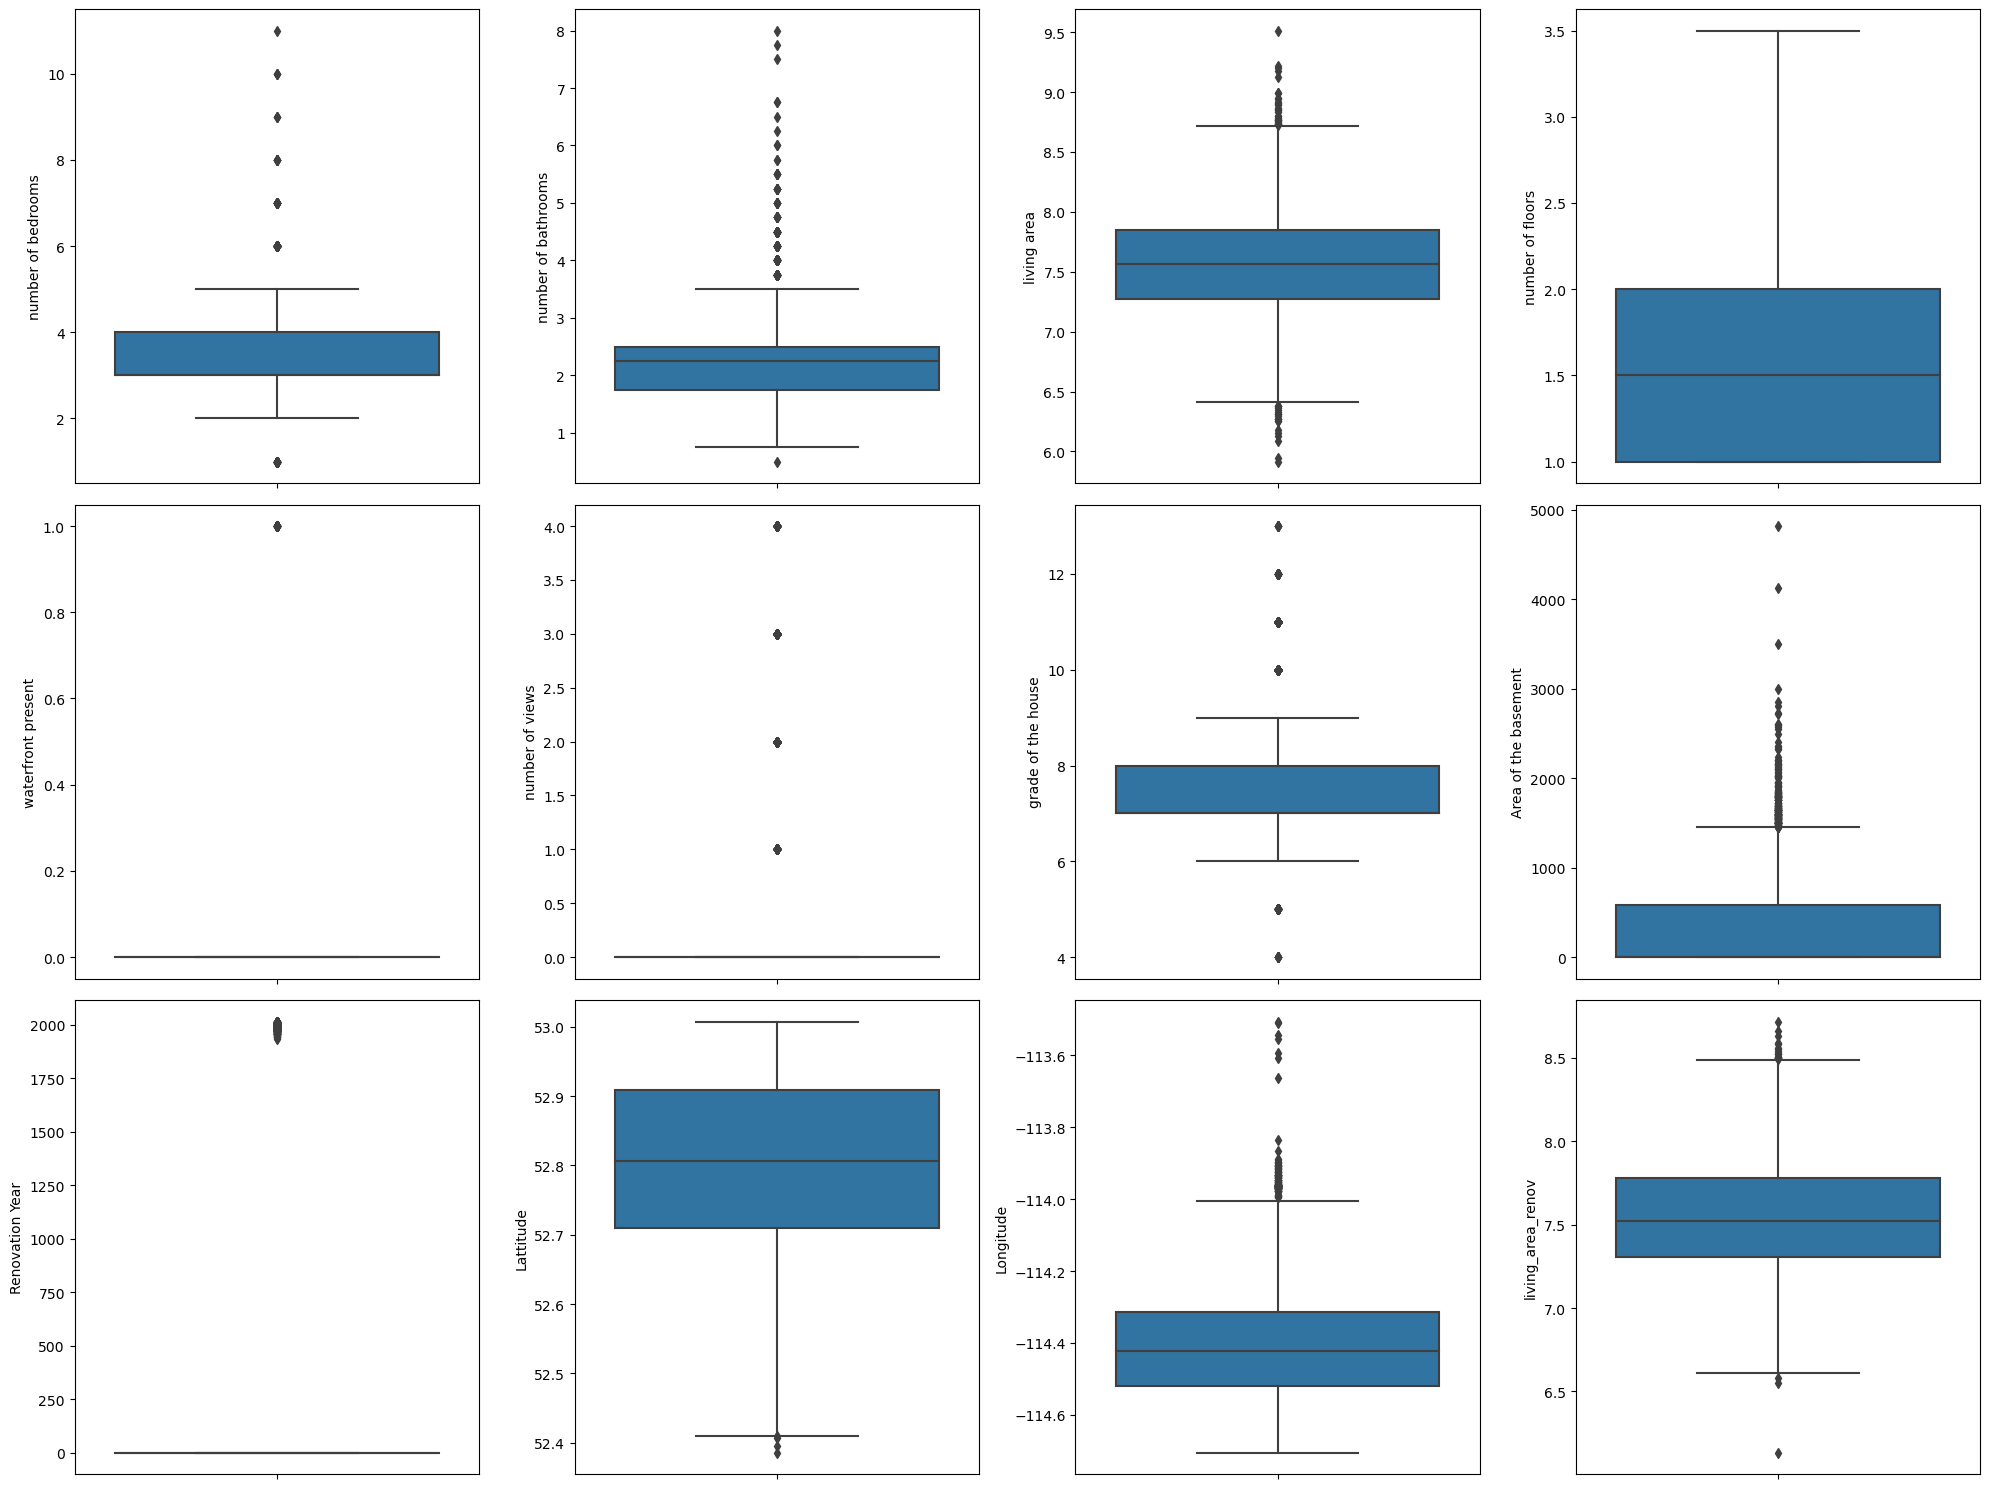

In [81]:
fig, axs = plt.subplots(3,4, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(X_train.columns[0:12]):
    sns.boxplot(data=X_train, y=col, ax=axs[i])
plt.tight_layout()

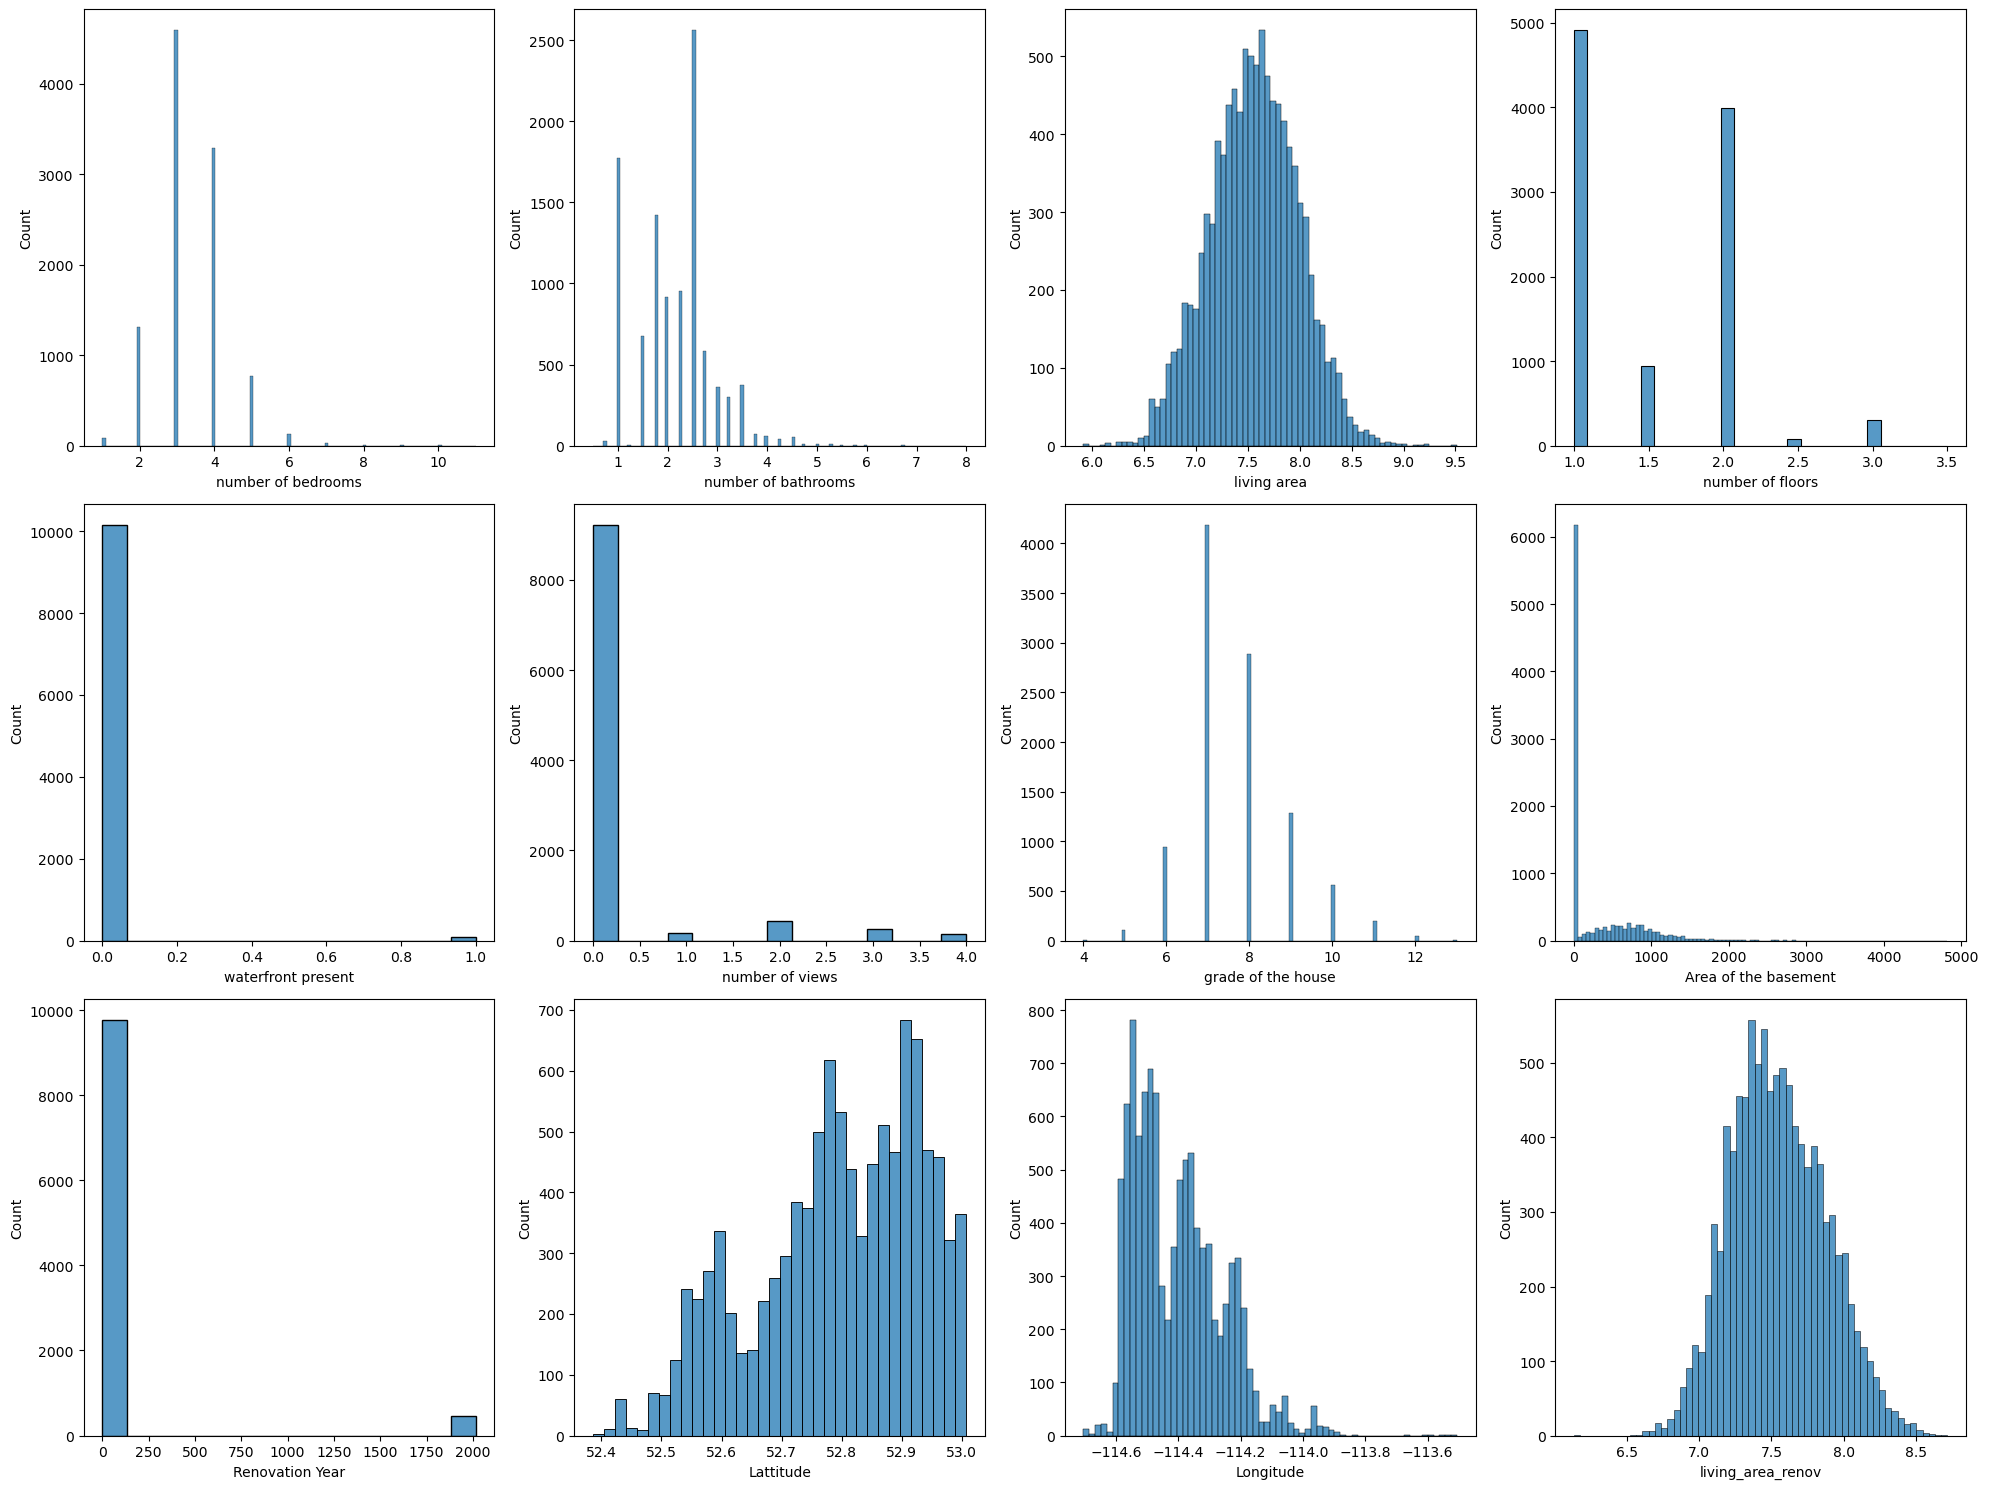

In [82]:
fig, axs = plt.subplots(3,4, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(X_train.columns[0:12]):
    sns.histplot(data=X_train, x=col, ax=axs[i])
plt.tight_layout()

<h1>Eliminating outliers (3σ)</h1>

![image](https://www.brightwalldarkroom.com/wp-content/uploads/2019/06/american-psycho-bale-e1560539531621.jpg)

In [83]:
X_train.reset_index(drop=True, inplace=True)

upper_limit = X_train['living area'].mean () + X_train['living area'].std () * 3
lower_limit = X_train['living area'].mean () - X_train['living area'].std () * 3

X_train = X_train[( X_train['living area'] < upper_limit) & ( X_train['living area'] > lower_limit)]

upper_limit = X_train['living_area_renov'].mean () + X_train['living_area_renov'].std () * 3
lower_limit = X_train['living_area_renov'].mean () - X_train['living_area_renov'].std () * 3

X_train = X_train[( X_train['living area'] < upper_limit) & ( X_train['living area'] > lower_limit)]

y_train = y_train[(X_train.index)]

In [84]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')

DummyClassifier: : 0.472640218878249
LogisticRegression: : 0.6169630642954856
DecisionTree: : 0.8177154582763337
NaiveBayes: : 0.6751025991792066


<h1>Experiments</h1>

In [85]:
X_train_nobe = pd.DataFrame(X_train, columns=['number of bedrooms'])
X_train_noba = pd.DataFrame(X_train, columns=["number of bathrooms"])
X_train_la = pd.DataFrame(X_train, columns=["living area"])
X_train_nof = pd.DataFrame(X_train, columns=['number of floors'])
X_train_wf = pd.DataFrame(X_train, columns=['waterfront present'])
X_train_nov = pd.DataFrame(X_train, columns=['number of views'])
X_train_goth= pd.DataFrame(X_train, columns=['grade of the house'])
X_train_aob = pd.DataFrame(X_train, columns=['Area of the basement'])
X_train_r = pd.DataFrame(X_train, columns=['Renovated'])
X_train_lar = pd.DataFrame(X_train, columns=['living_area_renov'])
X_train_lat = pd.DataFrame(X_train, columns=['Latitude'])
X_train_long = pd.DataFrame(X_train, columns=['Longitude'])

X_test_nobe = pd.DataFrame(X_test, columns=['number of bedrooms'])
X_test_noba = pd.DataFrame(X_test, columns=["number of bathrooms"])
X_test_la = pd.DataFrame(X_test, columns=["living area"])
X_test_nof = pd.DataFrame(X_test, columns=['number of floors'])
X_test_wf = pd.DataFrame(X_test, columns=['waterfront present'])
X_test_nov = pd.DataFrame(X_test, columns=['number of views'])
X_test_goth= pd.DataFrame(X_test, columns=['grade of the house'])
X_test_aob = pd.DataFrame(X_test, columns=['Area of the basement'])
X_test_r = pd.DataFrame(X_test, columns=['Renovated'])
X_test_lar = pd.DataFrame(X_test, columns=['living_area_renov'])
X_test_lat = pd.DataFrame(X_test, columns=['Latitude'])
X_test_long = pd.DataFrame(X_test, columns=['Longitude'])

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sd = StandardScaler()
mm = MinMaxScaler()

tmp1 = X_train
tmp_test1 = X_test

tmp2 = sd.fit_transform(tmp1)
tmp3 = mm.fit_transform(tmp1)

tmp_test2 = sd.fit_transform(tmp_test1)
tmp_test3 = mm.fit_transform(tmp_test1)

In [87]:
model1 = LogisticRegression(max_iter=1000, penalty= 'l2', solver='saga')
model2 = DecisionTreeClassifier(max_depth=7)
model3  = GaussianNB()
model4 = SVC()
model5 = KNeighborsClassifier(n_neighbors=10)
estimators=[('LR', model1), ('DT', model2), ('NB', model3), ('SVC', model4), ('KNN', model5)]

In [88]:
for estimator in estimators:
    estimator[1].fit(tmp1, y_train)
    y_pred = estimator[1].predict(tmp_test1)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')
    estimator[1].fit(tmp2, y_train)
    y_pred = estimator[1].predict(tmp_test2)
    print(f'{estimator[0]} STD: {accuracy_score(y_test, y_pred)}')
    estimator[1].fit(tmp3, y_train)
    y_pred = estimator[1].predict(tmp_test3)
    print(f'{estimator[0]} MM: {accuracy_score(y_test, y_pred)}')

LR: 0.6169630642954856
LR STD: 0.7705198358413132
LR MM: 0.7445280437756497
DT: 0.8177154582763337
DT STD: 0.8119015047879617
DT MM: 0.7626538987688098
NB: 0.6751025991792066
NB STD: 0.6730506155950753
NB MM: 0.6658686730506156
SVC: 0.48221614227086185
SVC STD: 0.8248974008207934
SVC MM: 0.7783857729138167
KNN: 0.6908344733242134
KNN STD: 0.8098495212038304
KNN MM: 0.7811217510259918


In [89]:
model6 = RandomForestClassifier(n_estimators = 100, max_depth = 3, min_samples_split = 20, max_features = 4, random_state=42, n_jobs = -1)
model7 = AdaBoostClassifier(random_state=1, algorithm = "SAMME", n_estimators=200)
model8 = GradientBoostingClassifier(random_state=1, learning_rate=0.01, max_depth=2, min_samples_split=20, min_samples_leaf=20)
model9 = XGBClassifier(random_state=1, n_estimators=200, learning_rate=0.01, booster="gbtree", max_depth=3)
estimators2=[('RF', model6), ('B', model7), ('GB', model8), ('XGB', model9)]

In [90]:
for estimator in estimators2:
    estimator[1].fit(tmp1, y_train)
    print(f'{estimator[0]}: {estimator[1].score(tmp_test1, y_test)}')
    estimator[1].fit(tmp2, y_train)
    print(f'{estimator[0]} STD: {estimator[1].score(tmp_test2, y_test)}')
    estimator[1].fit(tmp3, y_train)
    print(f'{estimator[0]} MM: {estimator[1].score(tmp_test3, y_test)}')

RF: 0.7670998632010944
RF STD: 0.7616279069767442
RF MM: 0.7298221614227086
B: 0.8136114911080712
B STD: 0.8115595075239398
B MM: 0.7975376196990424
GB: 0.761969904240766
GB STD: 0.7537619699042407
GB MM: 0.6781805745554036
XGB: 0.8057455540355677
XGB STD: 0.7660738714090287
XGB MM: 0.7346101231190151


<h1>Conclusions</h1>

In [91]:
X_train['number of bedrooms'] = mm.fit_transform(pd.DataFrame(X_train['number of bedrooms']))
X_test['number of bedrooms'] = mm.fit_transform(pd.DataFrame(X_test['number of bedrooms']))

In [92]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]}: {accuracy_score(y_test, y_pred)}')

LR: 0.6207250341997264
DT: 0.8177154582763337
NB: 0.6792065663474692
SVC: 0.48221614227086185
KNN: 0.7038303693570451


In [93]:
for estimator in estimators2:
    estimator[1].fit(X_train, y_train)
    print(f'{estimator[0]}: {estimator[1].score(X_test, y_test)}')   


RF: 0.7660738714090287
B: 0.8136114911080712
GB: 0.761969904240766
XGB: 0.8057455540355677


In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [95]:
dct = DecisionTreeClassifier(random_state=14, max_depth=11)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.84177   0.86158   0.85156      1062
           1    0.80868   0.82272   0.81564      1382
           2    0.82135   0.73750   0.77717       480

    accuracy                        0.82285      2924
   macro avg    0.82393   0.80727   0.81479      2924
weighted avg    0.82277   0.82285   0.82237      2924



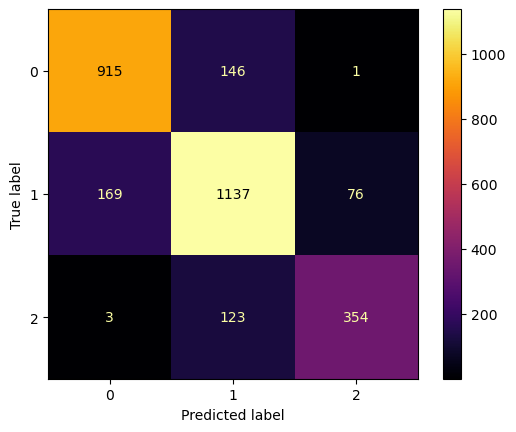

In [96]:
cm = confusion_matrix(y_test, y_pred)
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= dct.classes_)
plot.plot(cmap="inferno")

In [97]:
abc = AdaBoostClassifier(random_state=1, algorithm = "SAMME", n_estimators=200)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.87018   0.80791   0.83789      1062
           1    0.77329   0.85890   0.81385      1382
           2    0.82878   0.69583   0.75651       480

    accuracy                        0.81361      2924
   macro avg    0.82409   0.78755   0.80275      2924
weighted avg    0.81759   0.81361   0.81317      2924



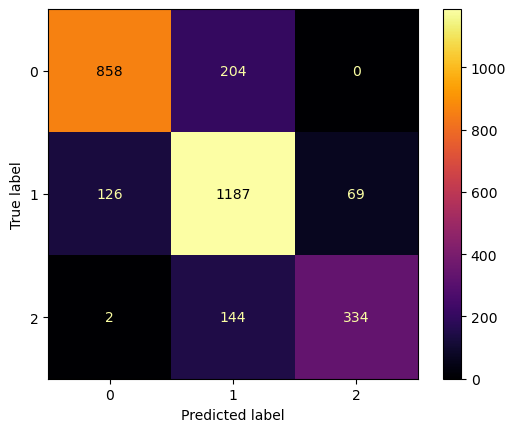

In [98]:
cm = confusion_matrix(y_test, y_pred)
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= dct.classes_)
plot.plot(cmap="inferno")

## Regresja logistyczna

In [99]:
# lr = LogisticRegression(max_iter=1000, penalty= 'l2', solver='saga')
# lr.fit(tmp1,y_train)
# y_pred1 = lr.predict(tmp_test)
# lr.fit(tmp2,y_train)
# y_pred2 = lr.predict(tmp_test)
# lr.fit(tmp3,y_train)
# y_pred3 = lr.predict(tmp_test)
# print("bez: ", accuracy_score(y_test, y_pred1))
# print("standaryzacja: ", accuracy_score(y_test, y_pred2))
# print("min- max: ", accuracy_score(y_test, y_pred3))

## Drzewo decyzyjne

In [100]:
# tree = DecisionTreeClassifier(max_depth=4)
# tree.fit(tmp1,y_train)
# y_pred1 = tree.predict(tmp_test)
# tree.fit(tmp2,y_train)
# y_pred2 = tree.predict(tmp_test)
# tree.fit(tmp3,y_train)
# y_pred3 = tree.predict(tmp_test)
# print("bez: ", accuracy_score(y_test, y_pred1))
# print("standaryzacja: ", accuracy_score(y_test, y_pred2))
# print("min- max: ", accuracy_score(y_test, y_pred3))

## SVM

In [101]:
# svm = SVC()
# svm.fit(tmp1,y_train)
# y_pred1 = svm.predict(tmp_test)
# svm.fit(tmp2,y_train)
# y_pred2 = svm.predict(tmp_test)
# svm.fit(tmp3,y_train)
# y_pred3 = svm.predict(tmp_test)
# print("bez: ", accuracy_score(y_test, y_pred1))
# print("standaryzacja: ", accuracy_score(y_test, y_pred2))
# print("min- max: ", accuracy_score(y_test, y_pred3))

## Naiwny Klasyfikator Bayesowski

In [102]:
# nb = GaussianNB()
# nb.fit(tmp1,y_train)
# y_pred1 = nb.predict(tmp_test)
# nb.fit(tmp2,y_train)
# y_pred2 = nb.predict(tmp_test)
# nb.fit(tmp3,y_train)
# y_pred3 = nb.predict(tmp_test)
# print("bez: ", accuracy_score(y_test, y_pred1))
# print("standaryzacja: ", accuracy_score(y_test, y_pred2))
# print("min - max: ", accuracy_score(y_test, y_pred3))

## Random Forest

In [103]:
# model_rf = RandomForestClassifier(n_estimators = 100, # Liczba słabych estymatorów
#                                   max_depth = 3, # Maksymalna wysokość drzewa w słabym estymatorze
#                                   min_samples_split = 20, # Minimalna liczba obserwacji wymagana do podziału węzła
#                                   max_features = 4, # Maksymalna liczba zmiennych brana pod uwagę przy podziale węzła
#                                   random_state=42,
#                                   n_jobs = -1)
# model_rf.fit(tmp1, y_train)
# print("bez: ", model_rf.score(tmp_test,y_test))
# model_rf.fit(tmp2, y_train)
# print("standaryzacja: ", model_rf.score(tmp_test,y_test))
# model_rf.fit(tmp3, y_train)
# print("min - max: ", model_rf.score(tmp_test,y_test))

## Boosting

In [104]:
# model = AdaBoostClassifier(random_state=1, algorithm = "SAMME", n_estimators=200)
# model.fit(tmp1, y_train)
# print("bez: ", model.score(tmp_test,y_test))
# model.fit(tmp2, y_train)
# print("standaryzacja: ", model.score(tmp_test,y_test))
# model.fit(tmp3, y_train)
# print("min - max: ", model.score(tmp_test,y_test))

## Gradient Boositng

In [105]:
# model = GradientBoostingClassifier(
#     random_state=1, learning_rate=0.01, max_depth=2, min_samples_split=20, min_samples_leaf=20)
# model.fit(tmp1, y_train)
# print("bez: ", model.score(tmp_test,y_test))
# model.fit(tmp2, y_train)
# print("standaryzacja: ", model.score(tmp_test,y_test))
# model.fit(tmp3, y_train)
# print("min - max: ", model.score(tmp_test,y_test))

## XG Boost

In [106]:
# model = XGBClassifier(
#     random_state=1,
#     n_estimators=200,  # Liczba drzew
#     learning_rate=0.01,  # Szybkość "uczenia" się
#     booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
#     max_depth=3,  # Maksymalna głębokość drzewa    
# )
# model.fit(tmp1, y_train)
# print("bez: ", model.score(tmp_test,y_test))
# model.fit(tmp2, y_train)
# print("standaryzacja: ", model.score(tmp_test,y_test))
# model.fit(tmp3, y_train)
# print("min - max: ", model.score(tmp_test,y_test))